In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [2]:
from extraction_sm import *

# Data Acquisition

In [3]:
# let's process multiple files at once - I want some nicer statistic
# this is a time-ordered file of filenames for SM1 or SM2
"""
fov = 1
# exclude calibration activities
pathfile = "split_filenames/filenames_sm{}_clean.txt".format(fov)


allfiles = []
f = open(pathfile, 'r')
allfiles = f.readlines()
f.close()

# strip away newlines and add absolute path prefix
allfiles = ["../../"+s.strip() for s in allfiles]


# select a few files - say some random date(s)
#mydates = ["2017-06-30","2017-07-01","2017-07-02","2017-07-03","2017-07-04"]
#mydates = ["2017-06-30"]
#mydates = ["2017-09-11"]

# get an entire month
#year = 2016   # 2017
#month = 10     # 6
#mydates = ["{}-{:02d}-{:02d}".format(year,month,day) for day in range(1,32)] # Feb 31 does not exist, but we don't care

# a specific range with strong stray light in the PPEs
mydates = ["{}-{:02d}-{:02d}".format(2016,4,day) for day in range(20,32)] + ["{}-{:02d}-{:02d}".format(2016,5,day) for day in range(1,11)]
#mydates = ["{}-{:02d}-{:02d}".format(2016,10,day) for day in range(15,32)]
#mydates = ["{}-{:02d}-{:02d}".format(2015,12,day) for day in range(15,32)]

sourcefiles = []

for date in mydates:
    sourcefiles += [s for s in allfiles if date in s]

"""
pathfile = "split_filenames/sm_abspaths_short.txt"


allfiles = []
f = open(pathfile, 'r')
allfiles = f.readlines()
f.close()

sourcefiles = [s.strip() for s in allfiles]
    
    
#sourcefiles = [sourcefiles[0]]  # if I want to use only one file
print("Using", len(sourcefiles), "files")

Using 262 files


In [7]:
out = []  # where our output will go
gains = []
rows = []
iobs = 0

# let's test the execution time
import time
timingstart = time.time()


for sourcefile in sourcefiles:
    print(iobs)
    iobs += 1
    (image,gain,bias,readnoise,fov,row,tstart,tstop) = sm_get_image_calib(sourcefile, "../../datasets/sm_bias/sm_calibdat.fits")
    
    if (fov==1 and row==4):
        starmask = sm_starmask(image, 2000, badcol=850)
    else:
        starmask = sm_starmask(image, 2000)

    #output = sm_cosmics(image, gain, bias, readnoise, starmask, sigclip=10., sigfrac=0.3, objlim=10.)
    # tweaked parameters from the validation
    output = sm_cosmics(image, gain, bias, readnoise, starmask, sigclip=10., sigfrac=0.1, objlim=25.)
    output.acqTime = tstart
    output.row = row
    output.fov = fov
    
    out.append(output)


timingend = time.time()
print("Elapsed time:", timingend - timingstart)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
Elapsed time: 709.9409074783325


# Saving the data

In [8]:
# time it
import time
tstart = time.time()


outfile = 'output/SM_2015-12.fits'
write_Obslist(out, outfile)


tend = time.time()
print("Elapsed time:", tend - tstart)

Elapsed time: 33.96804356575012


# Reading Data

In [20]:
import time
tstart = time.time()

inlist = read_Obslist_fits('SM1_2017-08.fits')

tend = time.time()
print("Elapsed time:", tend - tstart)

Elapsed time: 11.910966157913208


# Some diagnostics

In [37]:
# Do some statistics

Etot = []

# also for lengths, why not
AL = []
AC = []

        
for ii in range(len(out)):
    Etot += list(out[ii].data["TRACK_EN"])
    AL += list(out[ii].data["DIM_AL"]-1)
    AC += list(out[ii].data["DIM_AC"]-1)


Etot = np.array(Etot)
AL = np.array(AL)
AC = np.array(AC)

#Eflare=[]
#for ii in range(len(inlist)):
#    Eflare += list(inlist[ii].data["TRACK_EN"])
#Eflare = np.array(Eflare)

        
# number of cosmics
print(len(Etot), "cosmics")


93226 cosmics


Energies

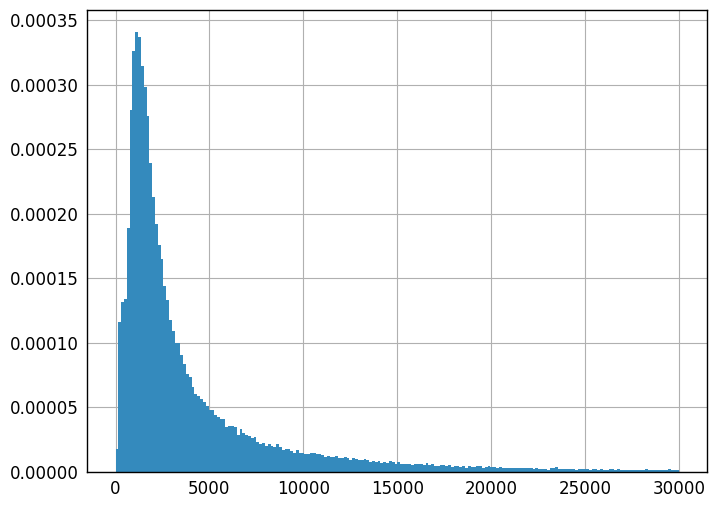

In [38]:
histE = plt.hist(Etot, 200, log=False ,range=(0,30000), normed=True)
#histEf = plt.hist(Eflare, 200, log=False ,range=(0,30000), normed=True,color="tab:red",histtype="stepfilled", alpha=0.6)

Lengths and angles

Weird thing: In a flare, this actually has the same maximum - although higher counts, especially where this one flattens off.

In [39]:
acqTimes = []

for ii in range(len(out)):
    acqTimes.append(out[ii].acqTime)
    
acqTimes = np.array(acqTimes)

First OBMT: 30354583995619100


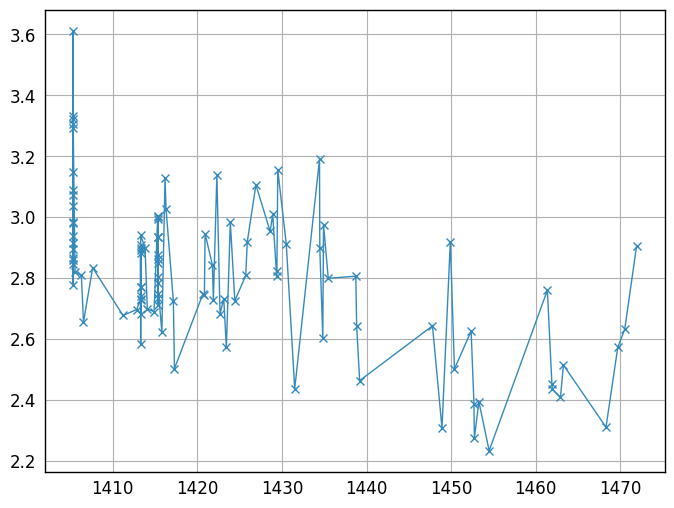

In [48]:
# fluxes
# I should group these by row
flux = [obs.calculate_flux() for obs in out]# if obs.row == 7]
acqTimes = np.array([obs.acqTime for obs in out])# if obs.row == 7])

plt.plot((acqTimes)/1e9/3600/6,flux,marker="x")

print("First OBMT:", acqTimes[0])

In [31]:
inlist1 = read_Obslist_fits('output/SM1_2017-08.fits')
inlist2 = read_Obslist_fits('output/SM2_2017-08.fits')

In [32]:
t1 = np.array([obs.acqTime for obs in inlist1])
t2 = np.array([obs.acqTime for obs in inlist2])

flux1 = np.array([obs.calculate_flux() for obs in inlist1])
flux2 = np.array([obs.calculate_flux() for obs in inlist2])

tcomb = list(t1)+list(t2)
fluxcomb = list(flux1)+list(flux2)

fluxcomb = [x for _,x in sorted(zip(tcomb,fluxcomb))]
tcomb.sort()

#fluxcomb.sort(key=tcomb)

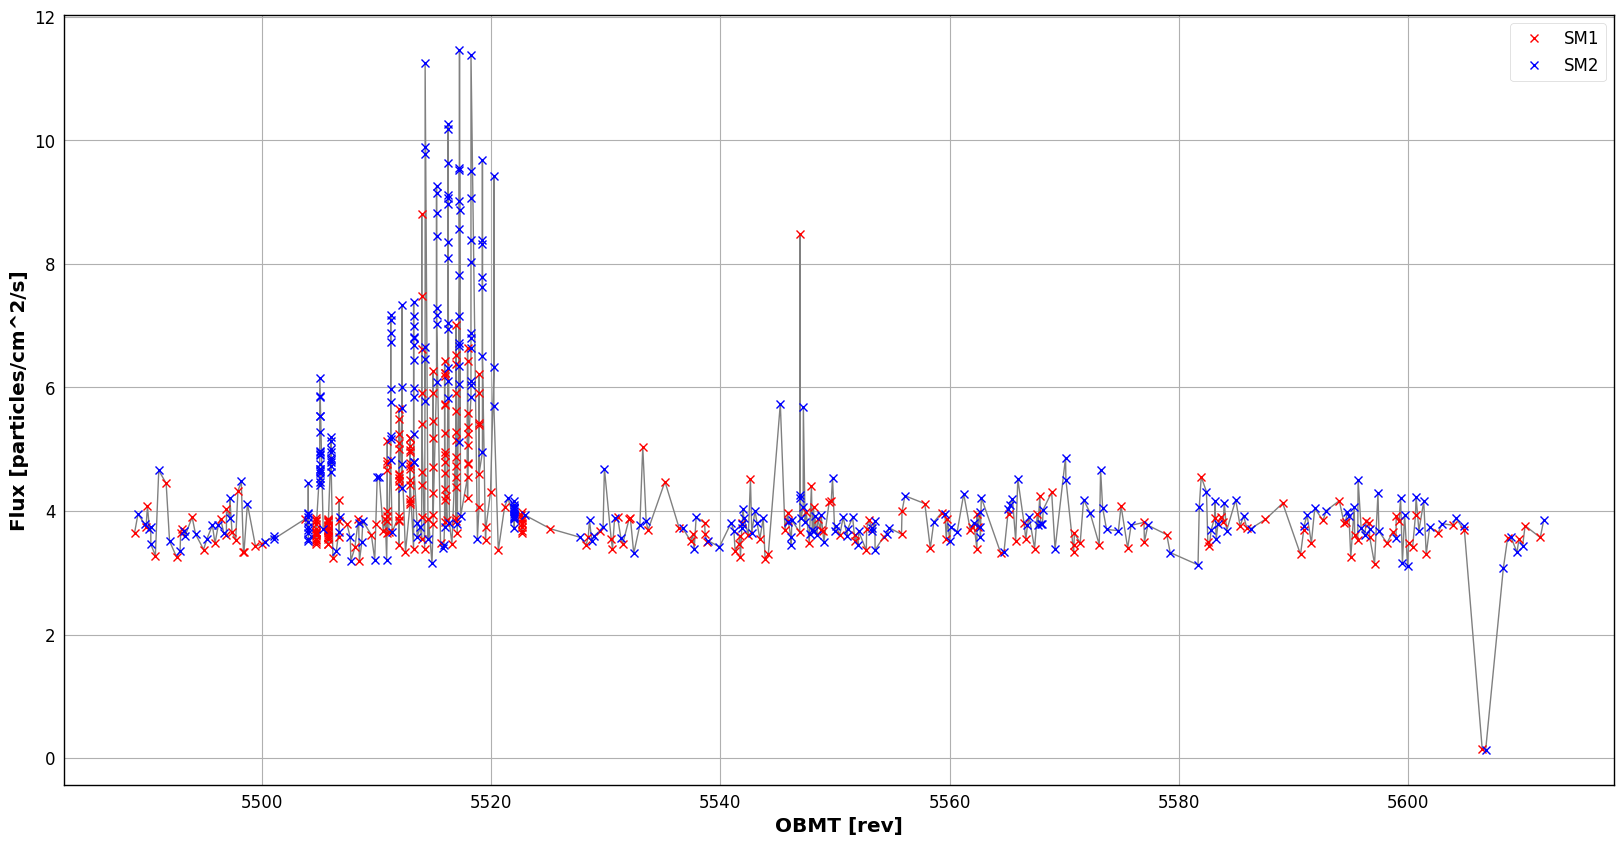

In [33]:
plt.plot(np.array(tcomb)/1e9/3600/6, fluxcomb, color='gray')

plt.plot((t1)/1e9/3600/6,flux1,marker="x", linestyle='', color='r', label="SM1")
plt.plot((t2)/1e9/3600/6,flux2,marker="x", linestyle='', color='b', label="SM2")
plt.legend(loc='best')

plt.xlabel("OBMT [rev]")
plt.ylabel("Flux [particles/cm^2/s]")
#plt.yscale("log")
#plt.xlim(5610,5630)
#plt.ylim(0,10)

plt.gcf().set_size_inches(20,10)

In [126]:
np.argmax(flux)

203

In [127]:
np.median(flux)

2.7999340638270023

In [42]:
# for fun - make a cosmic ray image from a TrackObs

iobs=128

obs = out[iobs]

obsimg = np.ones((obs.srcAL,obs.srcAC))

for ii in range(len(obs.data)):
    track = np.reshape(obs.data[ii]["TRACK"], (obs.data[ii]["DIM_AL"],obs.data[ii]["DIM_AC"]))
    start_AL = obs.data[ii]["LOC_AL"]
    stop_AL = obs.data[ii]["LOC_AL"] + obs.data[ii]["DIM_AL"]
    start_AC = obs.data[ii]["LOC_AC"]
    stop_AC = obs.data[ii]["LOC_AC"] + obs.data[ii]["DIM_AC"]
    obsimg[start_AL:stop_AL,start_AC:stop_AC] += track*gain

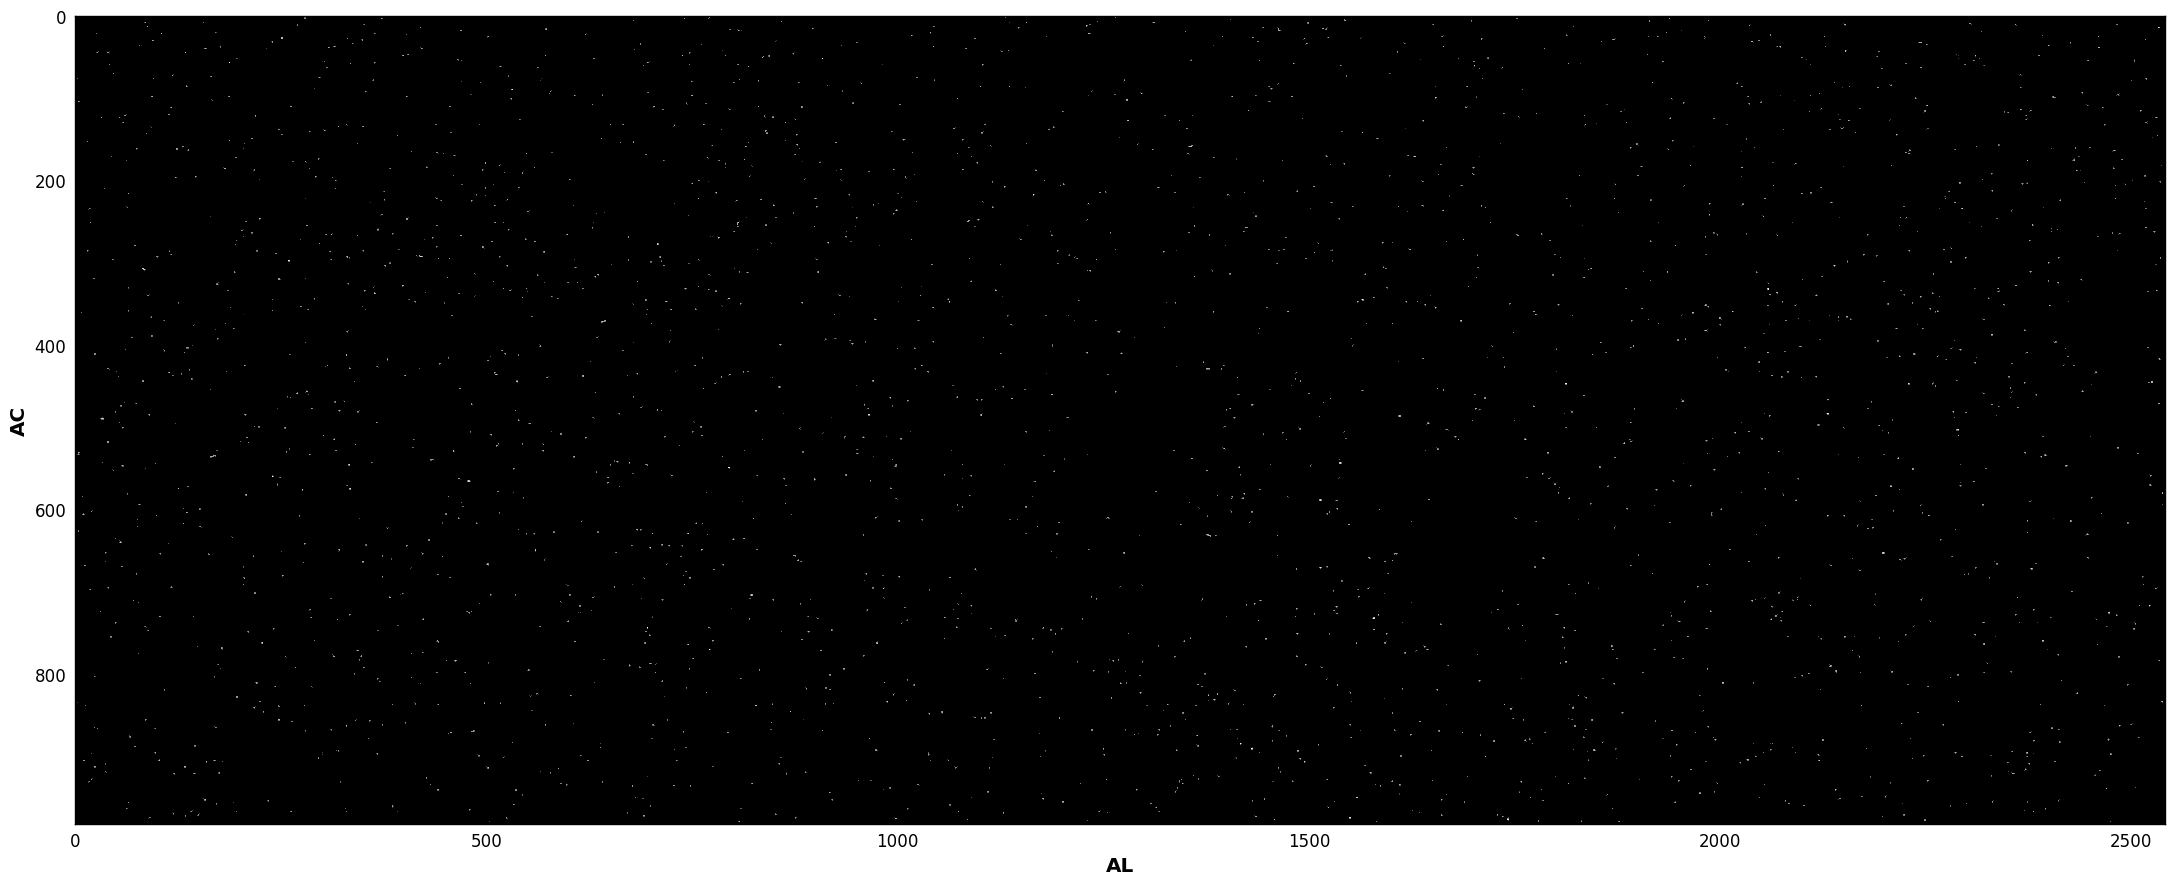

In [43]:
im=np.flip(np.rot90(obsimg,1),0)
plt.xlabel('AL')
plt.ylabel('AC')
plt.imshow(im, cmap='gray',norm=LogNorm())
#plt.imshow(image[30:60,70:120], cmap='gray')
plt.gcf().set_size_inches(30.5, 10.5)
#plt.colorbar(orientation="horizontal")
plt.grid(False)

In [31]:
print(sourcefiles[iobs])

../../datasets/sif_fits/2017-09-11/SIF_PROCESSING_CCD_ROW_4_SM2_OBMT_START_122106216998685500_CDP_NONE.fits


In [24]:
import time
tstart = time.time()

inlist = read_Obslist_fits('spark_output/2015/12/01/SM-SIF_OBMT_START_65944613999656700.fits')

tend = time.time()
print("Elapsed time:", tend - tstart)

Elapsed time: 0.09905719757080078


In [25]:
obs = inlist[0]
gain = obs.gain

In [26]:
len(inlist)

8

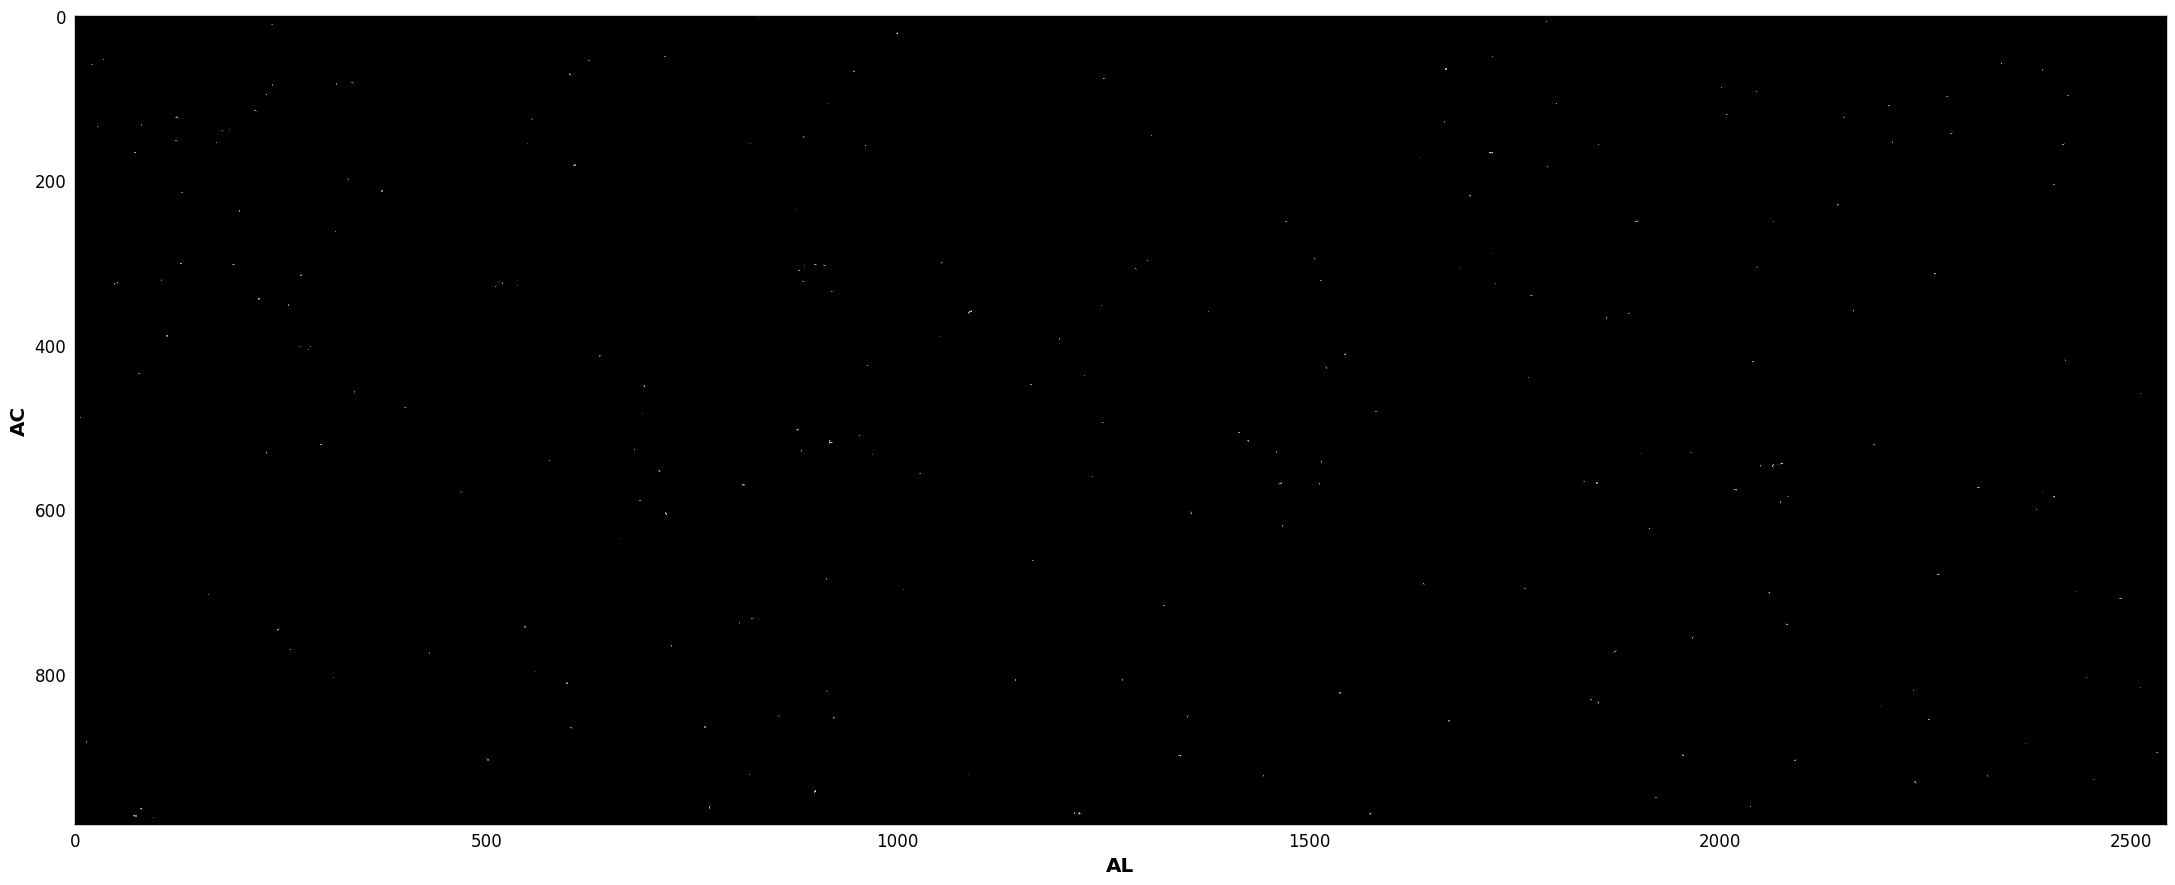

In [27]:
obsimg = np.ones((obs.srcAL,obs.srcAC))

for ii in range(len(obs.data)):
    track = np.reshape(obs.data[ii]["TRACK"], (obs.data[ii]["DIM_AL"],obs.data[ii]["DIM_AC"]))
    start_AL = obs.data[ii]["LOC_AL"]
    stop_AL = obs.data[ii]["LOC_AL"] + obs.data[ii]["DIM_AL"]
    start_AC = obs.data[ii]["LOC_AC"]
    stop_AC = obs.data[ii]["LOC_AC"] + obs.data[ii]["DIM_AC"]
    obsimg[start_AL:stop_AL,start_AC:stop_AC] += track*gain
    
im=np.flip(np.rot90(obsimg,1),0)
plt.xlabel('AL')
plt.ylabel('AC')
plt.imshow(im, cmap='gray',norm=LogNorm())
#plt.imshow(image[30:60,70:120], cmap='gray')
plt.gcf().set_size_inches(30.5, 10.5)
#plt.colorbar(orientation="horizontal")
plt.grid(False)

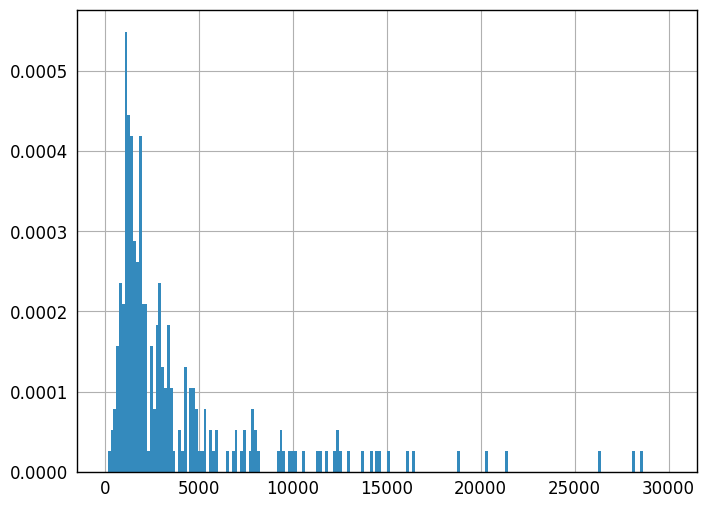

In [28]:
histE = plt.hist(obs.data['TRACK_EN'], 200, log=False ,range=(0,30000), normed=True)